In [2]:
import numpy as np 
0import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/Resume.csv')

In [34]:
df.head()  

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [36]:
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [37]:
df.describe() 

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [7]:
df.shape

(2484, 4)

In [13]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

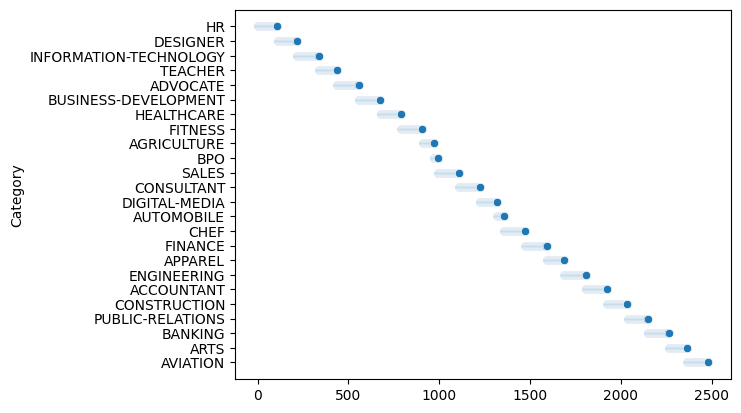

In [27]:

sns.scatterplot(df['Category'])
plt.show()       

In [28]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [32]:
df['Resume_html'][90]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME681760556" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_681760556_1_442898773" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field" id="681760556FNAM1"> </span> <span> </span> <span class="field" id="681760556LNAM1"> HR SHARED SERVICES ANALYST</span> </div> <div class="myGap"> </div> <div class="lowerborder thinbottomborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM681760558" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle thinbottomborder" id="SECTNAME_SUMM681760558"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_681760558_1_442898782" style="padding-top:0px;"> <div class="field singlecolumn" id="681760558FRFM1"> Versatile HR professional with a strong benefits administration background, pro

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [40]:
df['Resume_str'] = df['Resume_str'].str.strip()

In [41]:
df['Resume_html'] = df['Resume_html'].str.strip()

In [42]:
df['Category'] = df['Category'].str.upper()

<Axes: xlabel='Category'>

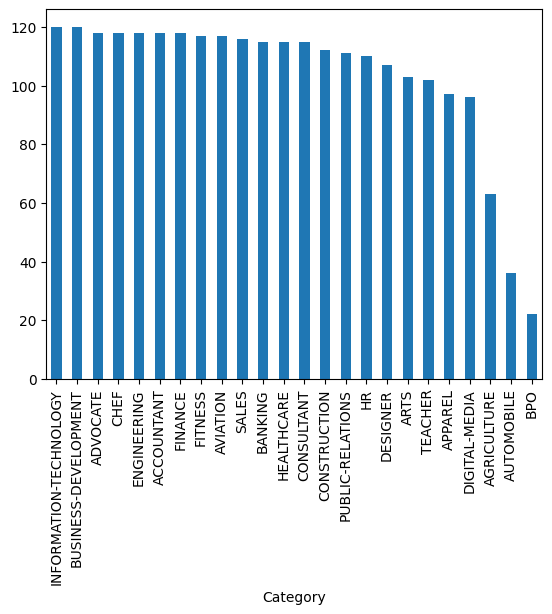

In [43]:
df['Category'].value_counts().plot(kind='bar')

<Axes: ylabel='Resume_str'>

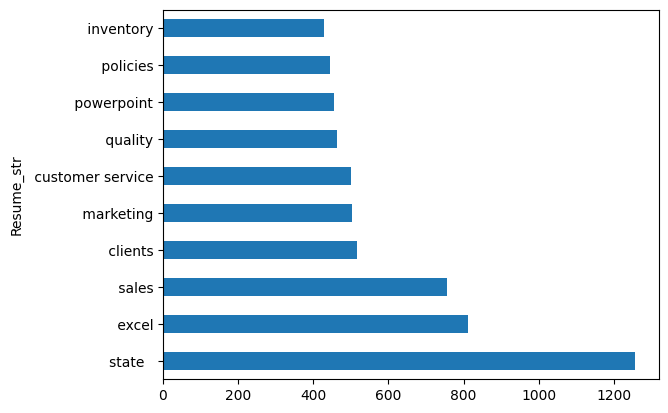

In [44]:
from collections import Counter
skills = df['Resume_str'].str.lower().str.split(',').explode().value_counts()
skills.head(10).plot(kind='barh')

In [47]:
from textblob import TextBlob
df['Sentiment'] = df['Resume_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

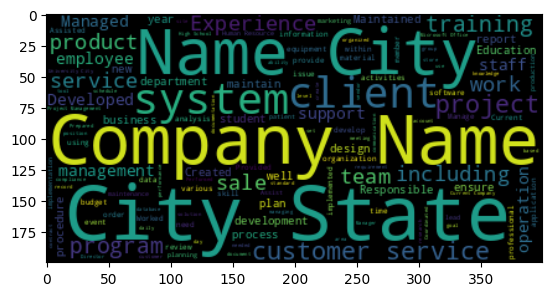

In [52]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(df['Resume_str']))
plt.imshow(wordcloud, interpolation='bilinear')

In [53]:
df.to_csv('Cleaned_Resumes.csv', index=False)

In [54]:
df = pd.read_csv('../data/Cleaned_Resumes.csv')

In [56]:
df.head()

,ID,Resume_str,Resume_html,Category,Sentiment
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,"<div class=""fontsize fontface vmargins hmargin...",HR,0.050296
1,22323967,"HR SPECIALIST, US HR OPERATIONS Summary ...","<div class=""fontsize fontface vmargins hmargin...",HR,0.105307
2,33176873,HR DIRECTOR Summary Over 20 years e...,"<div class=""fontsize fontface vmargins hmargin...",HR,0.069868
3,27018550,"HR SPECIALIST Summary Dedicated, Driv...","<div class=""fontsize fontface vmargins hmargin...",HR,0.138690
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,0.170676


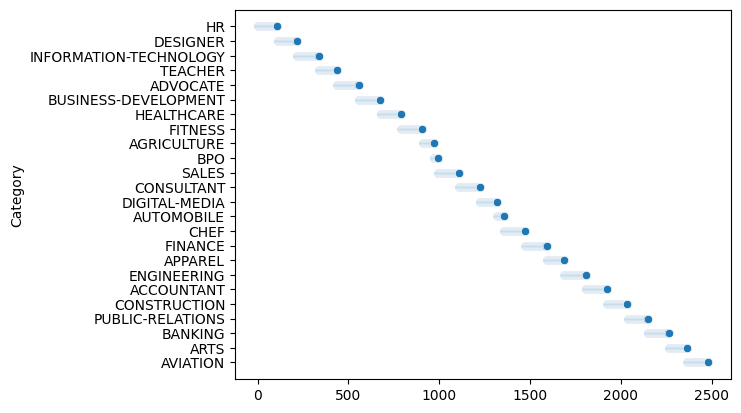

In [57]:
sns.scatterplot(df['Category'])
plt.show()  

In [58]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

<Axes: ylabel='Resume_str'>

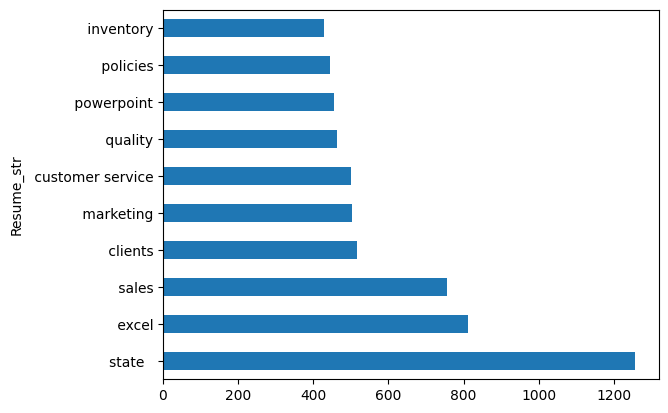

In [59]:
from collections import Counter
skills = df['Resume_str'].str.lower().str.split(',').explode().value_counts()
skills.head(10).plot(kind='barh')

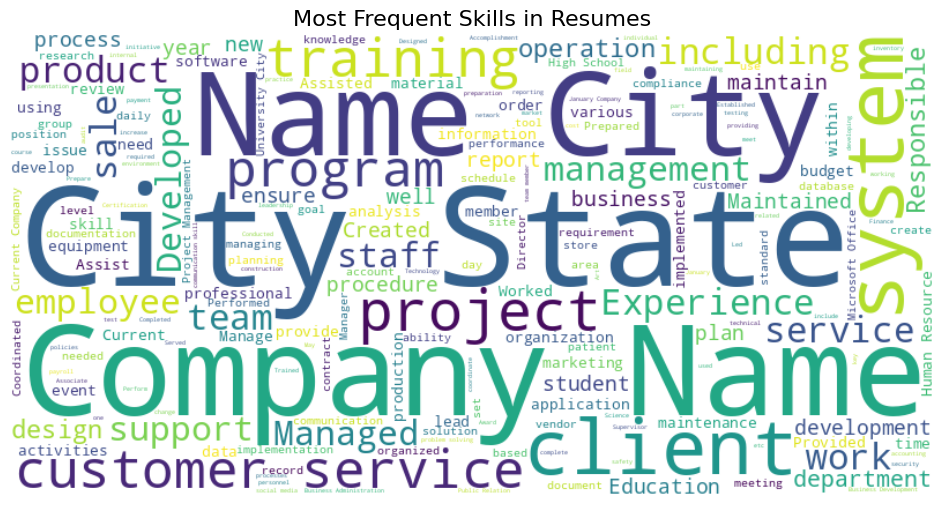

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['Resume_str'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Skills in Resumes', fontsize=16)
plt.show()

In [80]:

df['Resume_str'] = df['Resume_str'].fillna('')


def extract_skills(text):
    if isinstance(text, str):  
        skills_section = re.search(r'Skills[:\s]+(.+?)(?:\n|$)', text, re.IGNORECASE)
        if skills_section:
            return [skill.strip() for skill in skills_section.group(1).split(',')]
    return []  

df['Skills'] = df['Resume_str'].apply(extract_skills)

In [81]:
import re


def extract_skills(text):
    
    skills_section = re.search(r'Skills[:\s]+(.+?)(?:\n|$)', text, re.IGNORECASE)
    if skills_section:
        return [skill.strip() for skill in skills_section.group(1).split(',')]
    return []


df['Skills'] = df['Resume_str'].apply(extract_skills)
df['Skills'] = df['Skills'].apply(lambda x: ', '.join(x) if x else 'Not Provided')

In [79]:

df['Skills'] = df['Skills'].apply(lambda x: ', '.join(x) if x else 'Not Provided')

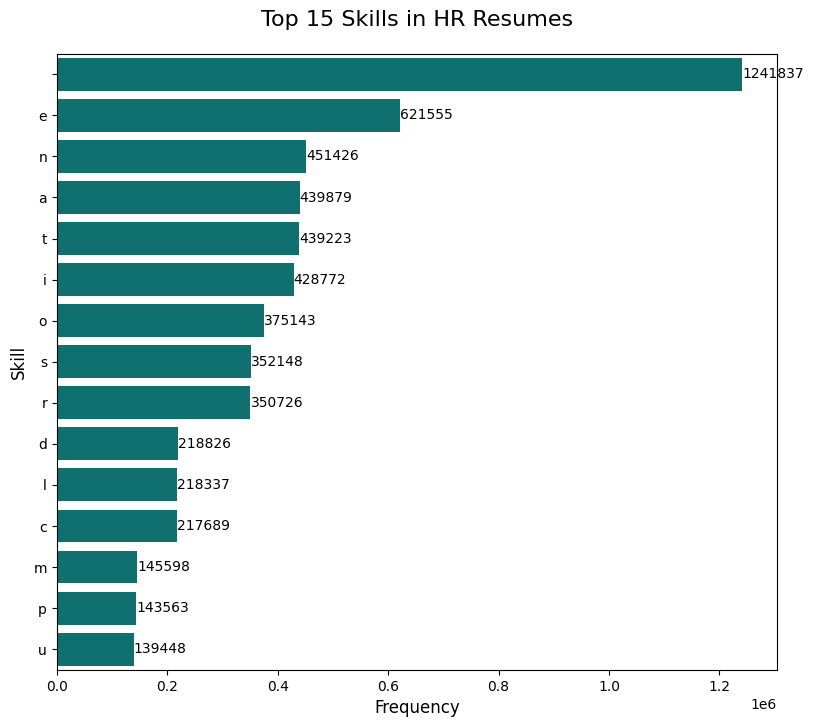

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


rcParams['font.family'] = 'DejaVu Sans' 


skills_count = df['Skills'].str.split(', ').explode().str.strip().value_counts().head(15)


plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=skills_count.values,
    y=skills_count.index,
    color='teal',  
    orient='h'
)


plt.title('Top 15 Skills in HR Resumes', fontsize=16, pad=20)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.yticks(range(len(skills_count)), skills_count.index)


for i, v in enumerate(skills_count.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=10)

plt.yticks(range(len(skills_count)), skills_count.index)


plt.subplots_adjust(left=0.3)  
plt.show()

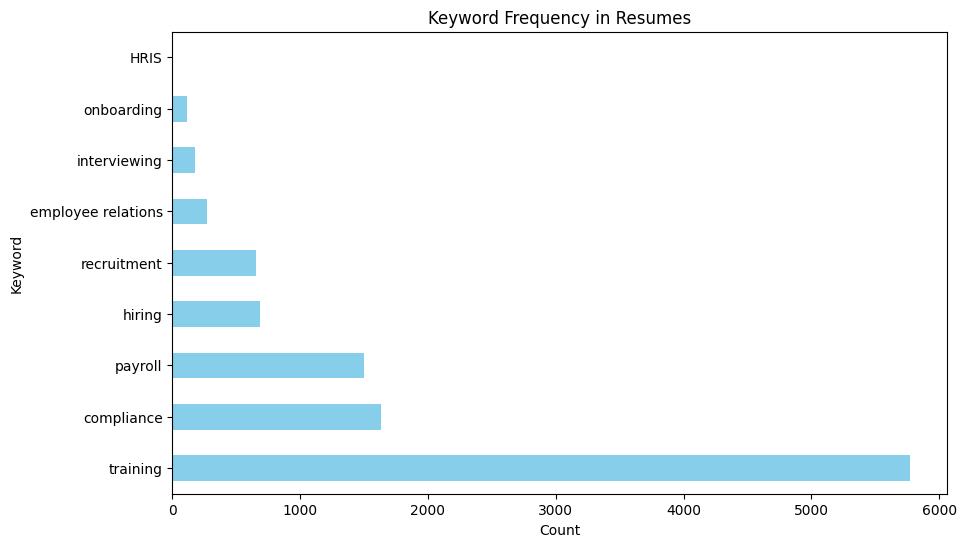

In [77]:
hr_keywords = [
    'recruitment', 'onboarding', 'payroll', 'employee relations', 
    'training', 'compliance', 'hiring', 'interviewing', 'HRIS'
]

def count_keywords(text):
    text = str(text).lower()  # Ensure text is string
    return {keyword: text.count(keyword) for keyword in hr_keywords}


keyword_counts = pd.DataFrame(df['Resume_str'].apply(count_keywords).tolist()).sum().sort_values(ascending=False)


keyword_counts.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Keyword Frequency in Resumes')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

In [76]:
df['Resume_str'][90]

"HR SHARED SERVICES ANALYST           Summary    Versatile HR professional with a strong benefits administration background, progressive cross-functional experience in broad range of HR functions including; HRIS, state and federal reporting, project management, client and vendor relation management, HR regulations, employee relations, HR policies and procedures, training, candidate screening and interviewing, employee oversight      Highlights        Applaud, Colleague, SAP, ADP, PeopleSoft, Microsoft Office, Aon/Hewitt HRIS Systems              Experience      HR Shared Services Analyst    September 2015   to   Current     Company Name   －   City  ,   State      Provide customer support for HRIS questions and issues by researching resolving simple to complex policy and transactional questions related to the use of the PeopleSoft HRIS and HR administrative policies and practices.  Assist in addressing and resolving inquiries from employees, managers and/or or internal HRBPs Provide tie